In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r"C:\Users\HP\Downloads\ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx")

In [3]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [5]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [6]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [7]:
df.duplicated().sum()

17

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

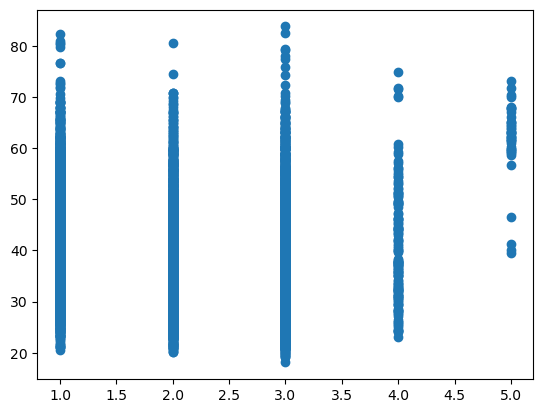

In [10]:
plt.scatter(df['Total Work Experience'],df['Age'],);

#### cheching for outliers

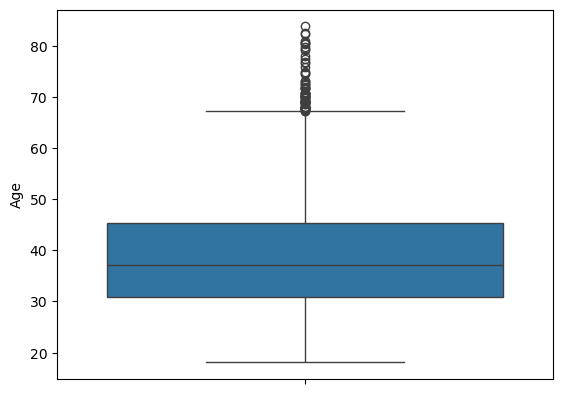

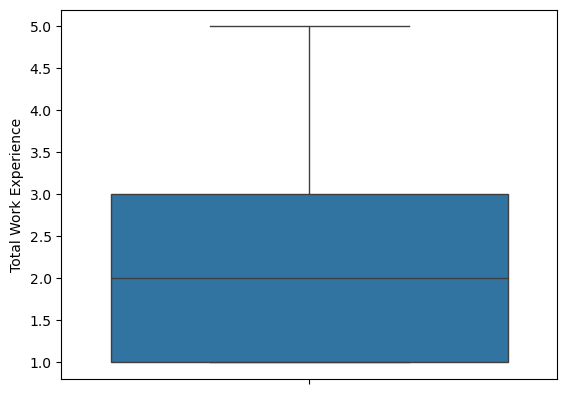

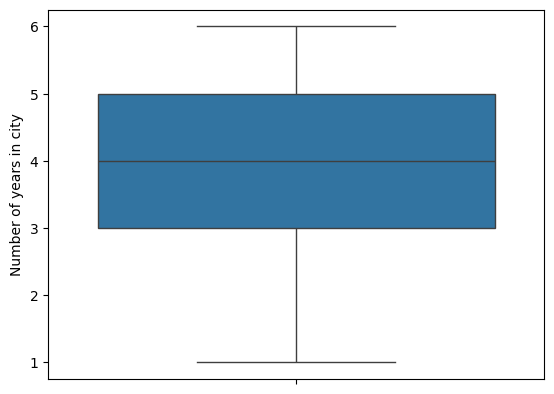

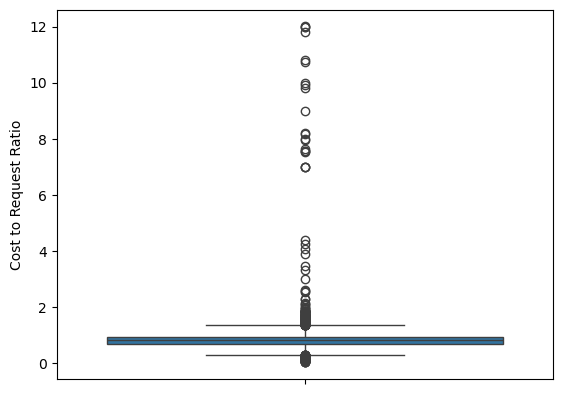

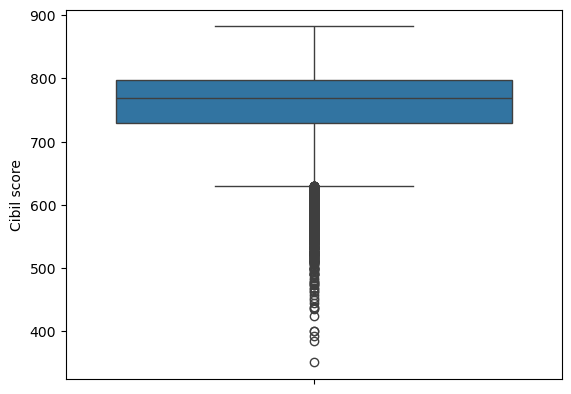

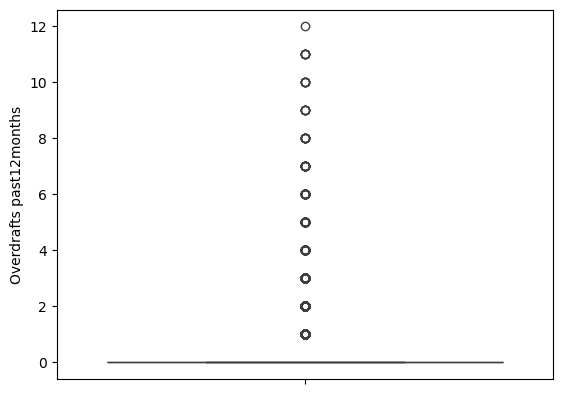

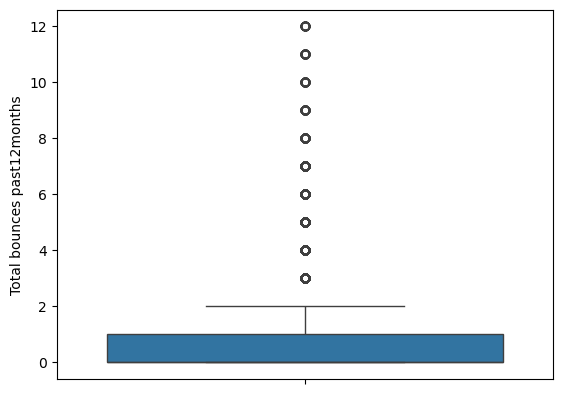

In [12]:
for col in df.columns:
    if df[col].dtype!='object':
        sns.boxplot(df[col])
        plt.show()

##### as AGE column contains outliers above 60 basically in real world people above age 60 are considered as retired so they are not elligible for any kind of loan

In [14]:
#df=df[df['Age']<60]

In [15]:
df

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


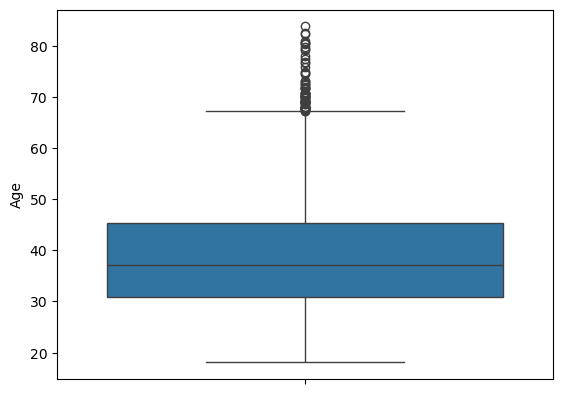

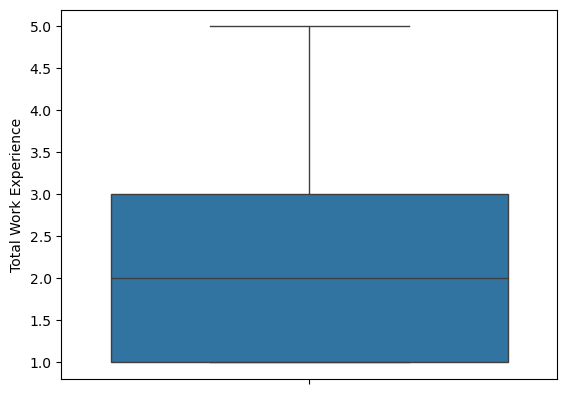

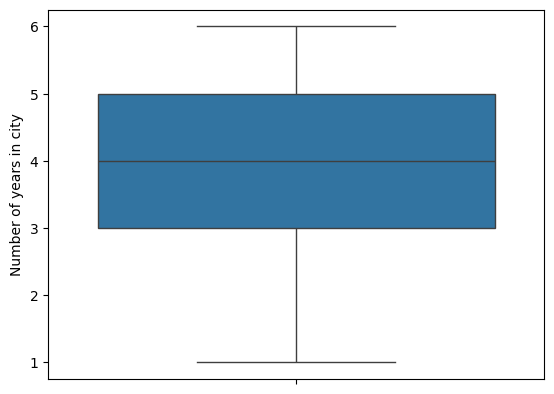

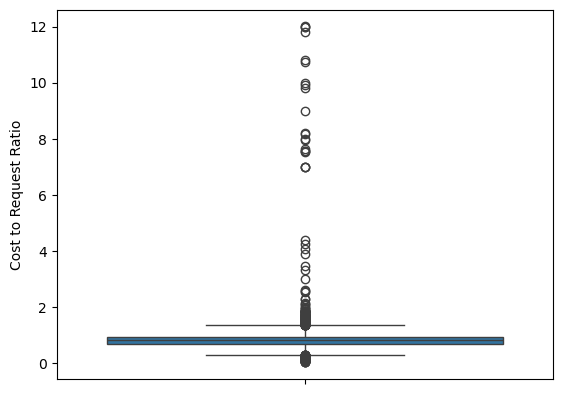

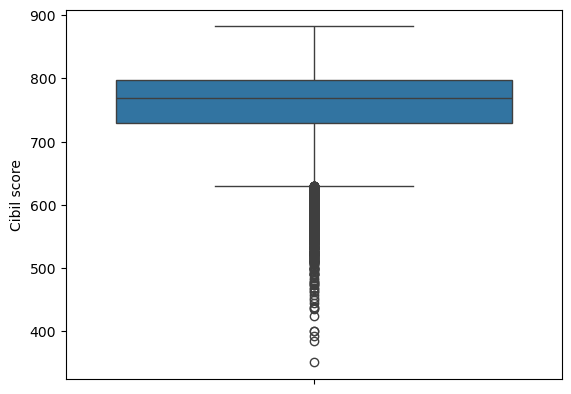

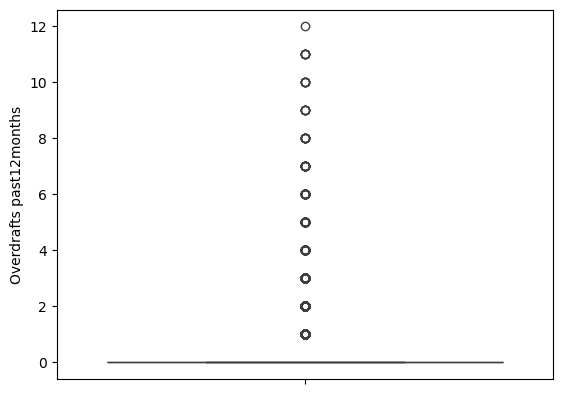

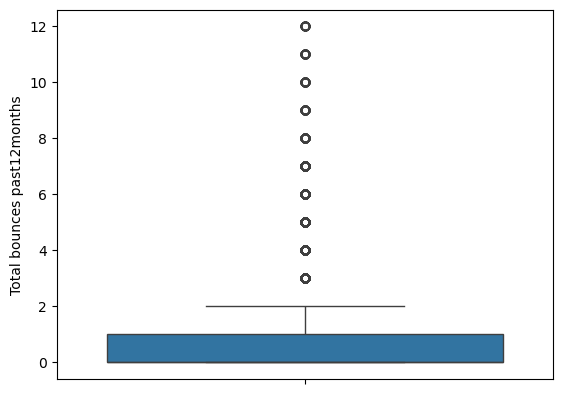

In [16]:
for col in df.columns:
    if df[col].dtype!='object':
        sns.boxplot(df[col])
        plt.show()

In [17]:
df['Total bounces past12months'].unique()

array([ 0,  1,  2,  3,  9,  7, 10,  4,  5,  8,  6, 12, 11], dtype=int64)

In [18]:
df['Overdrafts past12months'].unique()

array([ 0,  1,  2,  6,  3,  4, 11,  5, 10,  9,  7,  8, 12], dtype=int64)

In [19]:
df['Cibil score'].unique()

array([594, 754, 779, 818, 853, 777, 837, 738, 714, 788, 826, 836, 763,
       789, 764, 752, 663, 593, 731, 776, 840, 693, 784, 808, 857, 572,
       817, 661, 803, 675, 737, 739, 791, 712, 800, 740, 741, 725, 605,
       786, 801, 709, 546, 792, 769, 563, 825, 770, 848, 713, 774, 539,
       766, 756, 781, 804, 498, 767, 820, 684, 748, 772, 831, 815, 619,
       758, 521, 798, 785, 802, 727, 787, 730, 656, 614, 673, 806, 588,
       755, 761, 624, 723, 852, 686, 724, 587, 522, 609, 749, 530, 726,
       793, 578, 795, 783, 643, 575, 707, 844, 850, 811, 746, 771, 807,
       863, 635, 778, 523, 782, 744, 834, 728, 617, 735, 760, 762, 830,
       822, 773, 833, 805, 720, 745, 842, 672, 768, 627, 566, 622, 765,
       810, 750, 715, 718, 751, 630, 719, 839, 704, 702, 871, 743, 736,
       821, 548, 809, 757, 733, 639, 703, 832, 597, 682, 721, 823, 824,
       742, 797, 585, 812, 794, 828, 634, 580, 796, 855, 799, 519, 700,
       827, 816, 665, 759, 655, 775, 657, 734, 729, 859, 835, 67

In [20]:
df['Cost to Request Ratio']

0       0.842666
1       0.791667
2       0.727273
3       0.820232
4       0.455581
          ...   
8990    0.596748
8991    0.986793
8992    0.628330
8993    0.797193
8994    0.287659
Name: Cost to Request Ratio, Length: 8978, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8978 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8978 non-null   float64
 1   Total Work Experience       8978 non-null   int64  
 2   Number of years in city     8978 non-null   int64  
 3   Cost to Request Ratio       8978 non-null   float64
 4   Cibil score                 8978 non-null   int64  
 5   Overdrafts past12months     8978 non-null   int64  
 6   Total bounces past12months  8978 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 561.1 KB


In [22]:
# all this are real value so no need to drop them

#### spliting the dataset into features and output

In [24]:
x=df.drop('Total bounces past12months',axis=1)
y=df['Total bounces past12months']

#### spliting features into training and testing 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [28]:
x_train.shape

(6284, 6)

In [29]:
y_train.shape

(6284,)

In [30]:
x_test.shape

(2694, 6)

In [31]:
y_test.shape

(2694,)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model=KNeighborsClassifier()

In [34]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
model.predict(x.loc[[2]])

array([0], dtype=int64)

In [36]:
model.score(x_train,y_train)

0.678230426479949

In [37]:
model.score(x_test,y_test)

0.6299183370452858

In [38]:
train=[]
test=[]
for i in range(1,20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    train.append(model.score(x_train,y_train))
    test.append(model.score(x_test,y_test))

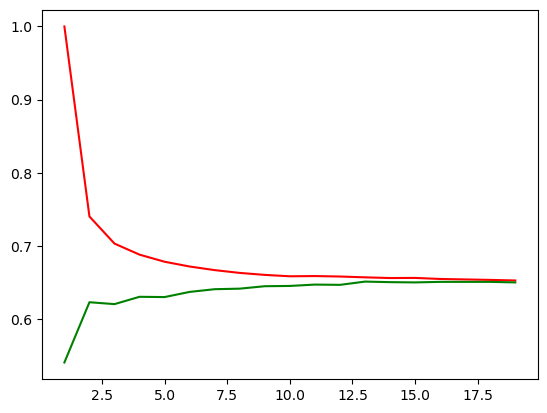

In [39]:
plt.plot(range(1,20),train,color='r')
plt.plot(range(1,20),test,color='g')

In [40]:
new_model=KNeighborsClassifier(n_neighbors=16)
new_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [41]:
new_model.score(x_train,y_train)

0.6546785486950987

In [42]:
new_model.score(x_test,y_test)

0.6507052709725315

In [43]:
y_pred=new_model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
accuracy_score(y_test,y_pred)

0.6507052709725315

In [46]:
print(confusion_matrix(y_test,y_pred))

[[1748    9    0    0    0    0    0    0    0    0    0    0    0]
 [ 362    5    0    0    0    0    0    0    0    0    0    0    0]
 [ 147    5    0    0    0    0    0    0    0    0    0    0    0]
 [ 103    2    0    0    0    0    0    0    0    0    0    0    0]
 [  66    2    1    0    0    0    0    0    0    0    0    0    0]
 [  53    1    0    0    0    0    0    0    0    0    0    0    0]
 [  34    0    0    0    0    0    0    0    0    0    0    0    0]
 [  34    1    0    0    0    0    0    0    0    0    0    0    0]
 [  29    2    0    0    0    1    0    0    0    0    0    0    0]
 [  28    3    0    0    0    0    0    0    3    0    0    0    0]
 [  22    1    0    0    0    0    0    0    0    0    0    0    0]
 [  19    0    0    0    0    0    0    1    0    0    0    0    0]
 [   8    1    1    0    0    0    1    0    1    0    0    0    0]]


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79      1757
           1       0.16      0.01      0.03       367
           2       0.00      0.00      0.00       152
           3       0.00      0.00      0.00       105
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        34
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00        34
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00        12

    accuracy                           0.65      2694
   macro avg       0.06      0.08      0.06      2694
weighted avg       0.45      0.65      0.52      2694



# now we will do model building by removing age > 60

In [93]:
new_df=df[df['Age']<60]

In [95]:
new_df

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


##### spliting the data into independent & dependent column

In [103]:
X=df.drop('Total bounces past12months',axis=1)
Y=df['Total bounces past12months']

##### now divide the data into training & testing

In [106]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,Y,train_size=0.8,random_state=42)

In [110]:
csl=KNeighborsClassifier()
csl.fit(X_TRAIN,Y_TRAIN)

KNeighborsClassifier()

In [112]:
model.score(X_TRAIN,Y_TRAIN)

0.6526037315511

In [114]:
model.score(X_TEST,Y_TEST)

0.6486636971046771

In [120]:
train=[]
test=[]
for i in range(1,20):
    cls=KNeighborsClassifier(n_neighbors=i)
    cls.fit(X_TRAIN,Y_TRAIN)
    train.append(cls.score(X_TRAIN,Y_TRAIN))
    test.append(cls.score(X_TEST,Y_TEST))

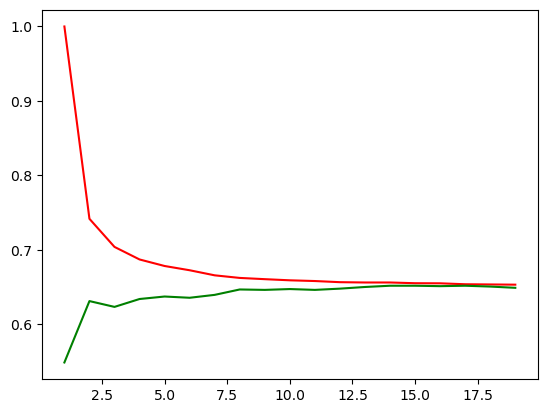

In [121]:
plt.plot(range(1,20),train,color='r')
plt.plot(range(1,20),test,color='g')

In [124]:
k_model=KNeighborsClassifier(n_neighbors=15)
k_model.fit(X_TRAIN,Y_TRAIN)

KNeighborsClassifier(n_neighbors=15)

In [126]:
k_model.score(X_TRAIN,Y_TRAIN)

0.6553884711779449

In [128]:
k_model.score(X_TEST,Y_TEST)

0.6520044543429844

# COLCLUSION : As removing values having age > 60 doesnt giving high accuracy so it is not necessary to remove outliers 